In [1]:
import pandas as pd

# Load the data from the provided Excel file
file_path = "C:/Users/lenovo/Desktop/intern project/internshal assignment.xlsx"
data = pd.read_excel(file_path)





In [2]:
data.head()

,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,...,w47,w48,w49,w50,w51,w52,w53,w54,w55,w56
0,fd7c28f9fd8045f2,fd7c28f9fd8045f2,fd7c28f9fd8045f2,fd7c28f9fd8045f2,fd7c28f9fd8045f2,231d91be38352d7a,306243851b716bf6,149f7dd1efe25ebc,191a909000d7123d,191a909000d7123d,...,ffedb2a5b3b4838,ffedb2a5b3b4838,fff444dcd8f9808f,ffedb2a5b3b4838,ffedb2a5b3b4838,ffedb2a5b3b4838,ffedb2a5b3b4838,fffe76c3a948cdfb,fffe76c3a948cdfb,fffe76c3a948cdfb
1,54910d2b363221e1,520443b0b8128202,a4bce0d054266d68,a4bce0d054266d68,c0bb01dbe2b2de0f,53010d4139ed029f,d1afc6d7c4661d7e,9ab44ee389767d59,91e804eb002a580d,5109246885c54360,...,ffe3d17a83edd05a,ffe3d17a83edd05a,ffedb2a5b3b4838,ffde16048235a32f,ffde16048235a32f,ffe7939306264854,ffe7939306264854,fff444dcd8f9808f,fff444dcd8f9808f,ffe7939306264854
2,520443b0b8128202,a4bce0d054266d68,7b042fcc54a45882,d98da6eaa4bb452f,7b042fcc54a45882,a4bce0d054266d68,3792a1c9395e3e2a,839d5042ee4d8988,a4bce0d054266d68,e254fb2201bf1419,...,ffde16048235a32f,ffde16048235a32f,ffde16048235a32f,ffd99d6c632283a9,ffc6c128db97ab1d,ffe3d17a83edd05a,ffb36133fb3c44e2,ffedb2a5b3b4838,ffedb2a5b3b4838,ffde16048235a32f
3,a4bce0d054266d68,d1afc6d7c4661d7e,aed9597fc6984d64,7b042fcc54a45882,c885df69f0e13074,d1afc6d7c4661d7e,7b042fcc54a45882,a4bce0d054266d68,306243851b716bf6,306243851b716bf6,...,ffb36133fb3c44e2,ffdce5869723d832,ffbafb7cc49be72,ffb36133fb3c44e2,ffb36133fb3c44e2,ffde16048235a32f,ffa8eb6c18e09543,ffe7939306264854,ffde16048235a32f,ffb94deefa8aa79f
4,3792a1c9395e3e2a,7b042fcc54a45882,407d67f50877e6f9,aed9597fc6984d64,aed9597fc6984d64,3792a1c9395e3e2a,a455b3d89d7d6a3b,306243851b716bf6,a99a477e2c336bb9,a99a477e2c336bb9,...,ff7e5bf81a779007,ffb36133fb3c44e2,ffb36133fb3c44e2,ffa96fa38b711342,ffa96fa38b711342,ffb36133fb3c44e2,ff7e5bf81a779007,ffde16048235a32f,ffb36133fb3c44e2,ffb36133fb3c44e2


In [3]:
# Initialize lists to store the metrics for each week
new_users = []
retained_users = []
resurrected_users = []
churned_users = []
quick_ratios = []

# Convert the dataframe to a list of sets for easier manipulation
weekly_active_users = [set(data[week].dropna()) for week in data.columns]

# Calculate the metrics for each week
for i in range(1, len(weekly_active_users)):
    current_week = weekly_active_users[i]
    previous_week = weekly_active_users[i - 1]
    
    # New users: Active this week but not in any previous week
    new = current_week - set().union(*weekly_active_users[:i])
    new_users.append(len(new))
    
    # Retained users: Active this week and also active in the previous week
    retained = current_week & previous_week
    retained_users.append(len(retained))
    
    # Resurrected users: Active this week but not in the previous week
    resurrected = current_week - previous_week - new
    resurrected_users.append(len(resurrected))
    
    # Churned users: Active in the previous week but not in the current week
    churned = previous_week - current_week
    churned_users.append(len(churned))
    
    # Quick ratio: (New + Resurrected) / Churned
    if len(churned) > 0:
        quick_ratio = (len(new) + len(resurrected)) / len(churned)
    else:
        quick_ratio = float('inf')  # To handle division by zero
    quick_ratios.append(quick_ratio)

# Create a DataFrame to store the results
metrics_df = pd.DataFrame({
    'Week': data.columns[1:],
    'New Users': new_users,
    'Retained Users': retained_users,
    'Resurrected Users': resurrected_users,
    'Churned Users': churned_users,
    'Quick Ratio': quick_ratios
})

metrics_df.head()


,Week,New Users,Retained Users,Resurrected Users,Churned Users,Quick Ratio
0,w2,723,931,0,828,0.873188
1,w3,645,1000,87,654,1.119266
2,w4,722,1169,225,563,1.682060
3,w5,674,1394,125,722,1.106648
4,w6,489,1479,187,714,0.946779


In [4]:
# Initialize lists to store the metrics for each week
new_users = []
retained_users = []
resurrected_users = []
churned_users = []
quick_ratios = []

# Convert the dataframe to a list of sets for easier manipulation
weekly_active_users = [set(data[week].dropna()) for week in data.columns]

# Handle the first week separately
first_week = weekly_active_users[0]
new_users.append(len(first_week))
retained_users.append(0)
resurrected_users.append(0)
churned_users.append(0)
quick_ratios.append(float('inf'))  # To avoid division by zero

# Calculate the metrics for each subsequent week
for i in range(1, len(weekly_active_users)):
    current_week = weekly_active_users[i]
    previous_week = weekly_active_users[i - 1]
    
    # New users: Active this week but not in any previous week
    new = current_week - set().union(*weekly_active_users[:i])
    new_users.append(len(new))
    
    # Retained users: Active this week and also active in the previous week
    retained = current_week & previous_week
    retained_users.append(len(retained))
    
    # Resurrected users: Active this week but not in the previous week
    resurrected = current_week - previous_week - new
    resurrected_users.append(len(resurrected))
    
    # Churned users: Active in the previous week but not in the current week
    churned = previous_week - current_week
    churned_users.append(len(churned))
    
    # Quick ratio: (New + Resurrected) / Churned
    if len(churned) > 0:
        quick_ratio = (len(new) + len(resurrected)) / len(churned)
    else:
        quick_ratio = float('inf')  # To handle division by zero
    quick_ratios.append(quick_ratio)

# Create a DataFrame to store the results
metrics_df = pd.DataFrame({
    'Week': data.columns,
    'New Users': new_users,
    'Retained Users': retained_users,
    'Resurrected Users': resurrected_users,
    'Churned Users': churned_users,
    'Quick Ratio': quick_ratios
})

metrics_df.head()


,Week,New Users,Retained Users,Resurrected Users,Churned Users,Quick Ratio
0,w1,1759,0,0,0,inf
1,w2,723,931,0,828,0.873188
2,w3,645,1000,87,654,1.119266
3,w4,722,1169,225,563,1.682060
4,w5,674,1394,125,722,1.106648


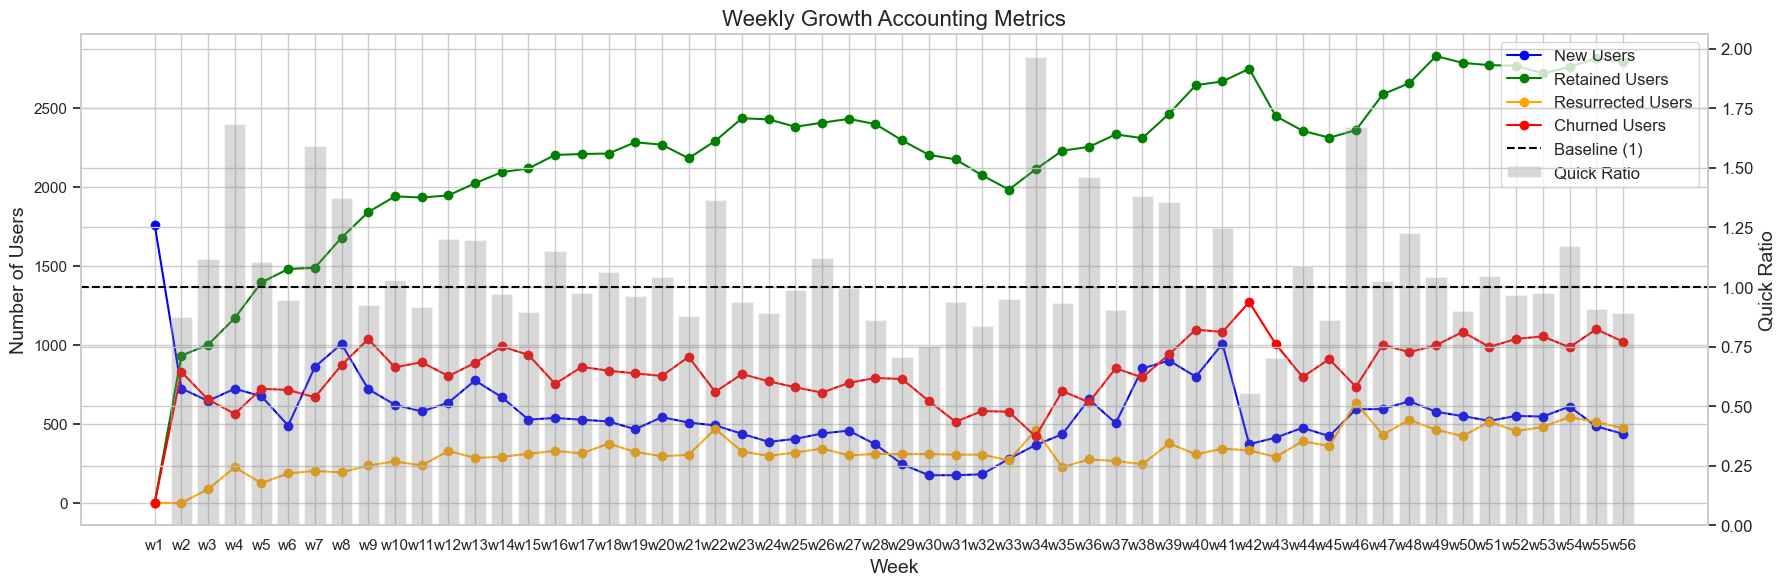

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming metrics_df is the DataFrame with the calculated metrics
sns.set(style="whitegrid")

# Set up the figure and axis
fig, ax1 = plt.subplots(figsize=(20, 8))

# Plot new, retained, resurrected, and churned users
ax1.plot(metrics_df['Week'], metrics_df['New Users'], label='New Users', marker='o', color='blue')
ax1.plot(metrics_df['Week'], metrics_df['Retained Users'], label='Retained Users', marker='o', color='green')
ax1.plot(metrics_df['Week'], metrics_df['Resurrected Users'], label='Resurrected Users', marker='o', color='orange')
ax1.plot(metrics_df['Week'], metrics_df['Churned Users'], label='Churned Users', marker='o', color='red')

# Set labels and title
ax1.set_xlabel('Week', fontsize=14)
ax1.set_ylabel('Number of Users', fontsize=14)
ax1.set_title('Weekly Growth Accounting Metrics', fontsize=16)
ax1.legend(loc='upper left', fontsize=12)
ax1.grid(True)

# Create a secondary y-axis for the quick ratio
ax2 = ax1.twinx()
ax2.bar(metrics_df['Week'], metrics_df['Quick Ratio'], alpha=0.3, color='grey', label='Quick Ratio')
ax2.set_ylabel('Quick Ratio', fontsize=14)
ax2.axhline(y=1, color='black', linestyle='--', label='Baseline (1)')  # Add a horizontal line at quick ratio = 1 for reference

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right', fontsize=12)

plt.xticks(rotation=85, fontsize=8)
plt.yticks(fontsize=12)
plt.tight_layout(pad=7.0)
plt.show()


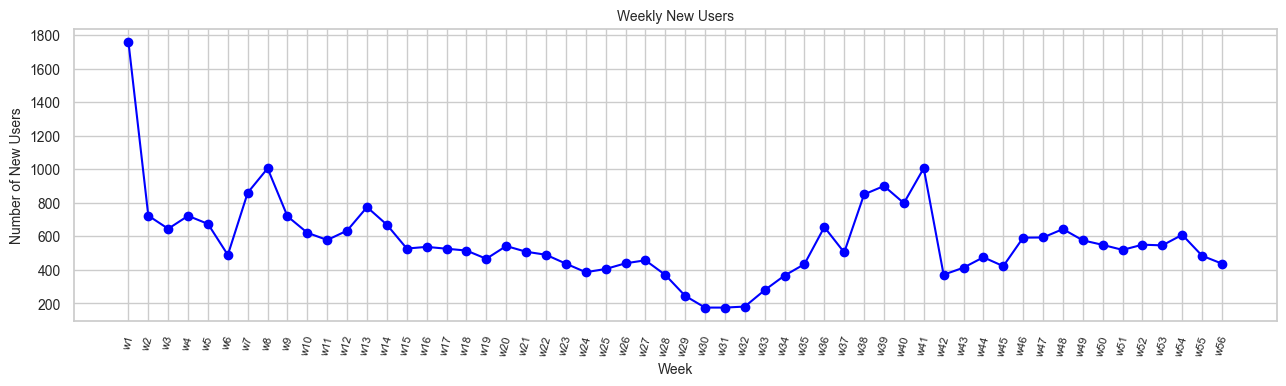

In [21]:

# Plot New Users
plt.figure(figsize=(15, 6))
plt.plot(metrics_df['Week'], metrics_df['New Users'], marker='o', color='blue')
plt.xlabel('Week', fontsize=10)
plt.ylabel('Number of New Users', fontsize=10)
plt.title('Weekly New Users', fontsize=10)
plt.xticks(rotation=75, fontsize=8)
plt.yticks(fontsize=10)
plt.tight_layout(pad=7.0)
plt.grid(True)
plt.show()

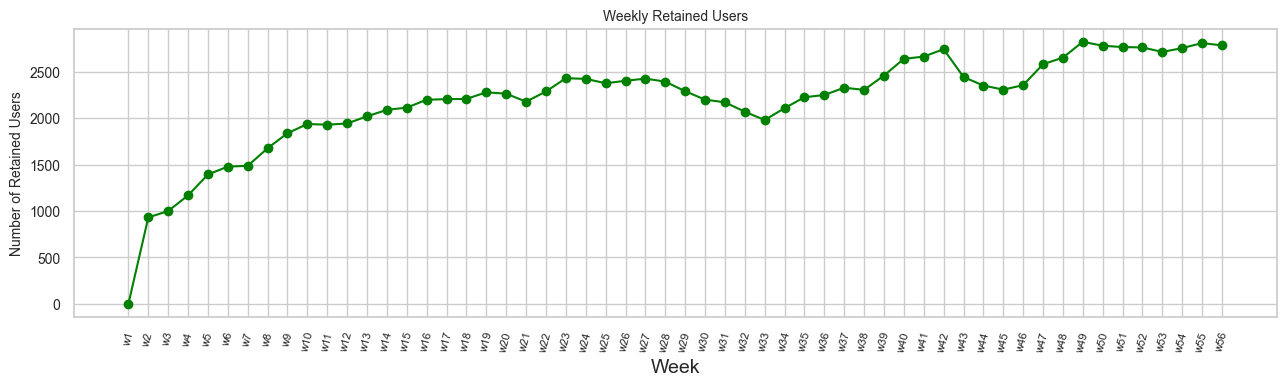

In [7]:
# Plot Retained Users
plt.figure(figsize=(15, 6))
plt.plot(metrics_df['Week'], metrics_df['Retained Users'], marker='o', color='green')
plt.xlabel('Week', fontsize=14)
plt.ylabel('Number of Retained Users', fontsize=10)
plt.title('Weekly Retained Users', fontsize=10)
plt.xticks(rotation=75, fontsize=8)
plt.yticks(fontsize=10)
plt.tight_layout(pad=7.0)
plt.grid(True)
plt.show()

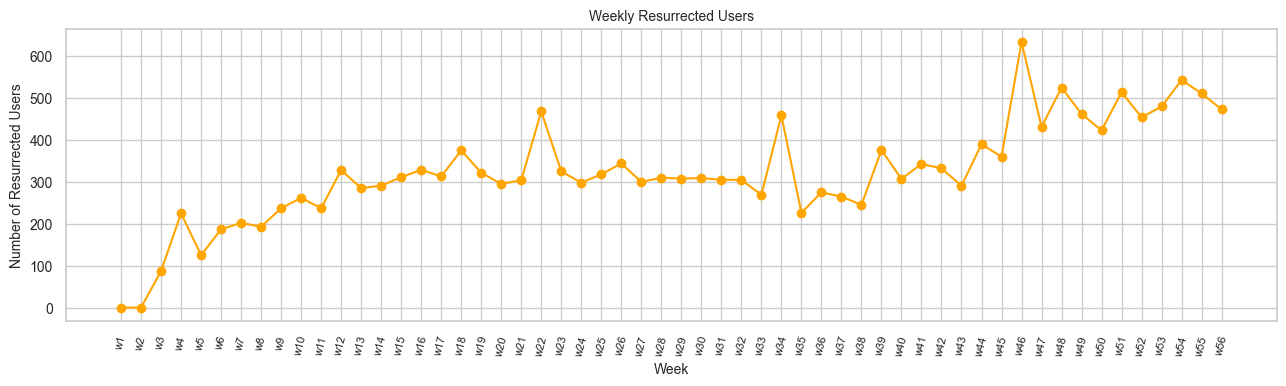

In [8]:


# Plot Resurrected Users
plt.figure(figsize=(15, 6))
plt.plot(metrics_df['Week'], metrics_df['Resurrected Users'], marker='o', color='orange')
plt.xlabel('Week', fontsize=10)
plt.ylabel('Number of Resurrected Users', fontsize=10)
plt.title('Weekly Resurrected Users', fontsize=10)
plt.xticks(rotation=75, fontsize=8)
plt.yticks(fontsize=10)
plt.tight_layout(pad=7.0)
plt.grid(True)
plt.show()



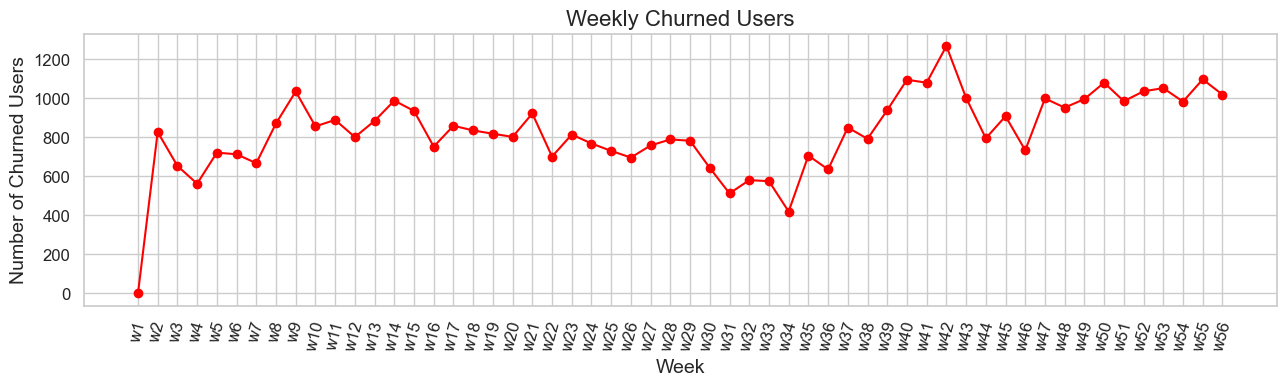

In [9]:
# Plot Churned Users
plt.figure(figsize=(15, 6))
plt.plot(metrics_df['Week'], metrics_df['Churned Users'], marker='o', color='red')
plt.xlabel('Week', fontsize=14)
plt.ylabel('Number of Churned Users', fontsize=14)
plt.title('Weekly Churned Users', fontsize=16)
plt.xticks(rotation=75, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout(pad=7.0)
plt.grid(True)
plt.show()

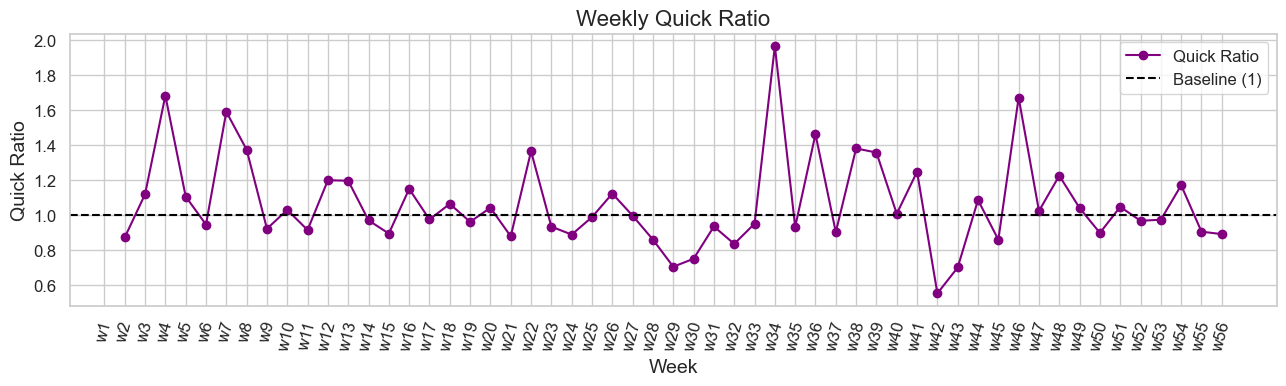

In [14]:
# line chart for the Quick Ratio
plt.figure(figsize=(15, 6))
plt.plot(metrics_df['Week'], metrics_df['Quick Ratio'], marker='o', color='purple', label='Quick Ratio')
plt.axhline(y=1, color='black', linestyle='--', label='Baseline (1)')  # Baseline for Quick Ratio
plt.xlabel('Week', fontsize=14)
plt.ylabel('Quick Ratio', fontsize=14)
plt.title('Weekly Quick Ratio', fontsize=16)
plt.xticks(rotation=75, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.tight_layout(pad=7.0)
plt.show()


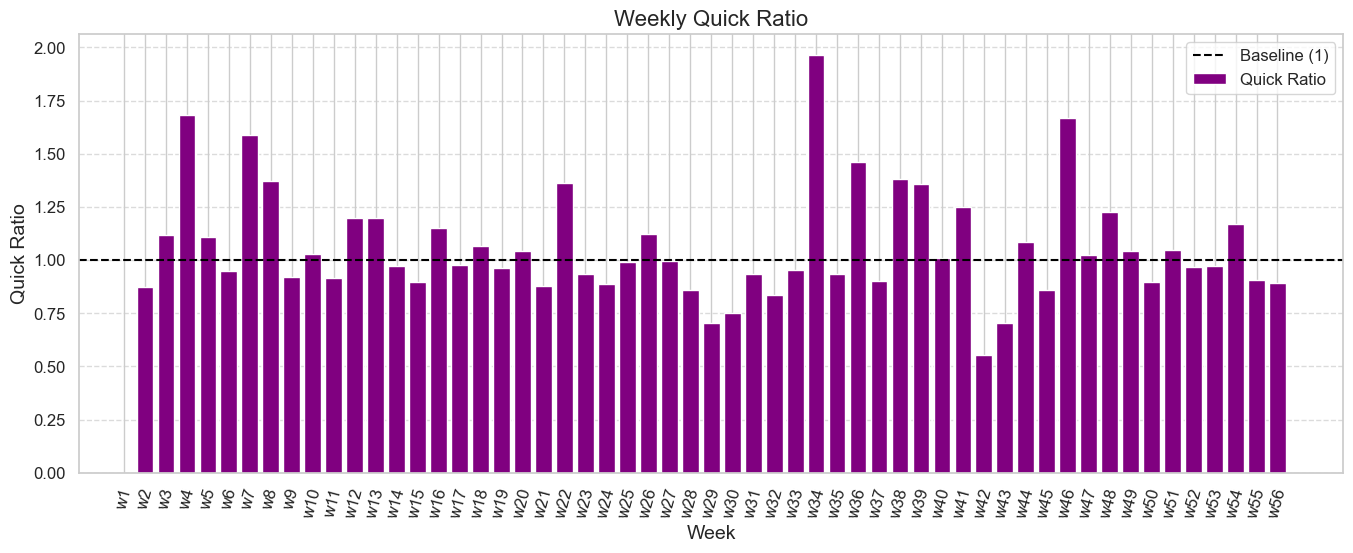

In [18]:
import matplotlib.pyplot as plt

# bar plot for the Quick Ratio
plt.figure(figsize=(15, 7))
plt.bar(metrics_df['Week'], metrics_df['Quick Ratio'], color='purple', label='Quick Ratio')
plt.axhline(y=1, color='black', linestyle='--', label='Baseline (1)')  # Baseline for Quick Ratio
plt.xlabel('Week', fontsize=14)
plt.ylabel('Quick Ratio', fontsize=14)
plt.title('Weekly Quick Ratio', fontsize=16)
plt.xticks(rotation=75, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout(pad=5.0)
plt.show()
